# Basic NR waveform analyses

Illustrates the use of the `wave` and `mwave` objects to work with BAM and Cactus/THC output waveforms

## 0. Start

Clone the repo somewhere and install the package:

```
mkdir somewhere/
cd somehwere/
git clone git@git.tpi.uni-jena.de:core/watpy.git
cd watpy
python setup.py --user
```

Now look at the folders and see some files: they contain python code, functions and classes.

Go to the tutorial

```
cd tutorials
```

and find this tutorial.

The following assumes there is some test data in folders called `TestData/MySim_BAM_135135` and `TestData/MySim_THC_135135`. 
We will be writing some files, so along the way we will create few more folders inside those.

## 1. Load waveforms from a simulation and compute the strain

In [6]:
import os, sys
from watpy.wave.wave import * # wave() and mwave() objects
from watpy.utils.units import MSun_sec

You probably know all the details of what you have simulated with BAM ... so collect this info:

In [2]:
Msun_sec = MSun_sec() #4.925794970773135e-06

bamsim = {}
bamsim['folder'] = 'TestData/MySim_BAM_135135' # simulation folder
bamsim['mass'] = 2.700297e+00 # binary mass in solar masses
bamsim['q'] = 1.0 # mass ratio, >= 1
bamsim['Momg22'] = 3.789461e-02 # GW frequency (dim/less, mass rescaled)
bamsim['f0'] = bamsim['Momg22'] / (2*np.pi) / bamsim['mass'] # initial GW frequency in geom. units
bamsim['f0_Hz'] = bamsim['Momg22'] / (2*np.pi) / bamsim['mass']  / Msun_sec # initial GW frequency in Hz
bamsim['massA'] = 1.350149e+00
bamsim['massB'] = 1.350149e+00
bamsim['madm'] = 2.678040e+00 # ADM mass (t=0) 
bamsim['jadm'] = 7.858842e+00 # ADM ang.mom. (t=0) 
bamsim['MbA'] = 1.494607e+00
bamsim['MbB'] = 1.494607e+00
bamsim['level'] = 7
bamsim['levelm'] = 4
bamsim['nxyz'] = 320
bamsim['nmxyz'] = 128
bamsim['dxyz']= 7.520000e+00
bamsim['eos']= 'CSC'
# etc ...

bamsim['pre-release-folder'] = './TestData/MySim_BAM_135135/CoReDB' # folder with CoRe formatted files

#print(mysim['Momg22']) # 0.03789461

# Create folder for CoRe output
os.makedirs(bamsim['pre-release-folder'], exist_ok = True)

Next, we use watpy `wave` and `mwave` classes to compute few things from the $\Psi_4$ output modes. 

### Compute the strain of $(2,2)$ mode with the FFI and write files in CoRe format

In [3]:
w = wave(path = bamsim['folder'], code='bam', filename='Rpsi4mode22_r12.l0', 
         mass = bamsim['mass'], f0 = bamsim['f0'])

This does a few things behind the scenes, for example it computes the strain. Let'sask for it: 

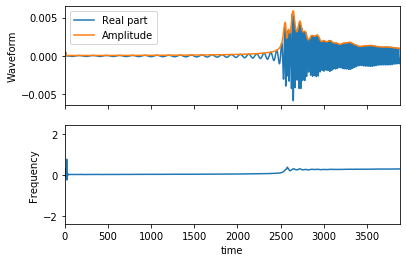

In [4]:
fig = w.show_psi4()

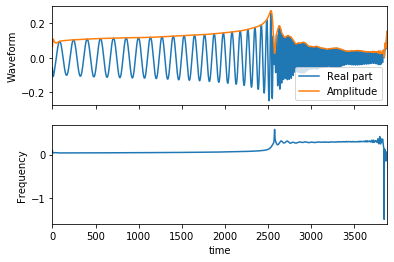

In [5]:
w.get_strain(fcut= bamsim['f0'])
fig = w.show_strain()

Now lets save the data in CoRe format and prepare them for a pre-release (check your folder afterwards)

In [6]:
w.write_to_txt('Psi4', bamsim['pre-release-folder'])
w.write_to_txt('h', bamsim['pre-release-folder'])

### Compute the strain with the FFI for many modes

Make a list of files containing the modes

In [7]:
import glob
fnames = [os.path.split(x)[1] for x in glob.glob('{}/{}'.format(bamsim['folder'],'Rpsi4mode??_r12.l0'))]
print(fnames)

['Rpsi4mode43_r12.l0', 'Rpsi4mode41_r12.l0', 'Rpsi4mode21_r12.l0', 'Rpsi4mode33_r12.l0', 'Rpsi4mode40_r12.l0', 'Rpsi4mode32_r12.l0', 'Rpsi4mode22_r12.l0', 'Rpsi4mode44_r12.l0', 'Rpsi4mode31_r12.l0', 'Rpsi4mode30_r12.l0', 'Rpsi4mode42_r12.l0', 'Rpsi4mode20_r12.l0']


Now we do pretty much the same as above but with the class for multipolar waveforms:

In [8]:
wm = mwaves(path = bamsim['folder'], code = 'bam', filenames = fnames, 
            mass = bamsim['mass'], f0 = bamsim['f0'], ignore_negative_m=True)

We can look again to the $(2,2)$ this way

In [9]:
h22 = wm.get(l=2,m=2)

or also check which modes are there and look at them this way:

In [10]:
print(wm.modes)

[(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


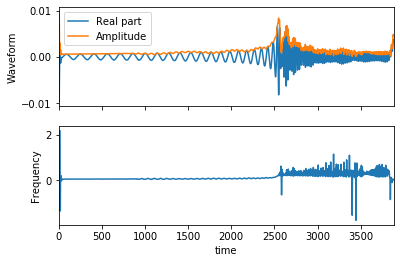

In [11]:
h32 = wm.get(l=3, m=2)
fig = h32.show_strain()

## 2. Write/read data in CoRe format

### Write to CoRe formatted `.txt` files

Now we save the modes in CoRe format:

In [12]:
for (l,m) in wm.modes:
        
        psilm = wm.get(var='Psi4',l=l, m=m)
        psilm.write_to_txt('Psi4', bamsim['pre-release-folder'])
        
        hlm = wm.get(l=l, m=m)
        hlm.write_to_txt('h', bamsim['pre-release-folder'])

... and also compute and write the energy curves

In [13]:
wm.energetics(bamsim['massA'], bamsim['massB'], bamsim['madm'], bamsim['jadm'], 
              path_out = bamsim['pre-release-folder'])

### Read from CoRe formatted `.txt` files

The `wave` class can also read CoRe format, obviously.

In [14]:
fnames = [os.path.split(x)[1] for x in glob.glob('{}/{}'.format(bamsim['pre-release-folder'],'Rh_l?_m?_r*.txt'))]
print(fnames)

['Rh_l2_m2_r00800.txt', 'Rh_l4_m4_r00800.txt', 'Rh_l4_m3_r00800.txt', 'Rh_l4_m2_r00800.txt', 'Rh_l2_m0_r00800.txt', 'Rh_l3_m3_r00800.txt', 'Rh_l3_m2_r00800.txt', 'Rh_l3_m0_r00800.txt', 'Rh_l4_m1_r00800.txt', 'Rh_l3_m1_r00800.txt', 'Rh_l2_m1_r00800.txt', 'Rh_l4_m0_r00800.txt']


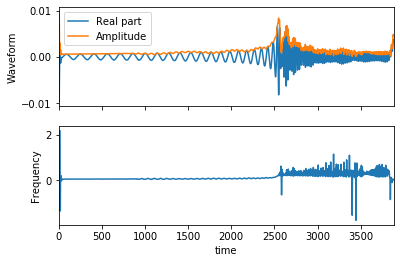

In [15]:
wm_c = mwaves(bamsim['pre-release-folder'], code = 'core', filenames = fnames, 
              mass = bamsim['mass'], f0 = bamsim['f0'], ignore_negative_m=True)
h32 = wm.get(l=3, m=2)
fig = h32.show_strain()

### HDF5 

Finally, we can create HDF5 data in CoRe format using the `CoRe_h5()` object

In [16]:
from watpy.utils.coreh5 import CoRe_h5
bamsim = {}
bamsim['pre-release-folder'] = './TestData/MySim_BAM_135135/CoReDB'

In [17]:
ch5 = CoRe_h5(bamsim['pre-release-folder'],None) # write .h5 to mysim['pre-release-folder'] ...

In [18]:
ch5.create(path=bamsim['pre-release-folder']) # ... all the CoRe .txt files in mysim['pre-release-folder']

wrote CoRe ./TestData/MySim_BAM_135135/CoReDB/data.h5


In [19]:
ch5.dump() # h5dump -n

energies
energies/EJ_r00800.txt
rh_20
rh_20/Rh_l2_m0_r00800.txt
rh_21
rh_21/Rh_l2_m1_r00800.txt
rh_22
rh_22/Rh_l2_m2_r00800.txt
rh_30
rh_30/Rh_l3_m0_r00800.txt
rh_31
rh_31/Rh_l3_m1_r00800.txt
rh_32
rh_32/Rh_l3_m2_r00800.txt
rh_33
rh_33/Rh_l3_m3_r00800.txt
rh_40
rh_40/Rh_l4_m0_r00800.txt
rh_41
rh_41/Rh_l4_m1_r00800.txt
rh_42
rh_42/Rh_l4_m2_r00800.txt
rh_43
rh_43/Rh_l4_m3_r00800.txt
rh_44
rh_44/Rh_l4_m4_r00800.txt
rpsi4_20
rpsi4_20/Rpsi4_l2_m0_r00400.txt
rpsi4_20/Rpsi4_l2_m0_r00800.txt
rpsi4_21
rpsi4_21/Rpsi4_l2_m1_r00400.txt
rpsi4_21/Rpsi4_l2_m1_r00800.txt
rpsi4_22
rpsi4_22/Rpsi4_l2_m2_r00400.txt
rpsi4_22/Rpsi4_l2_m2_r00800.txt
rpsi4_30
rpsi4_30/Rpsi4_l3_m0_r00800.txt
rpsi4_31
rpsi4_31/Rpsi4_l3_m1_r00800.txt
rpsi4_32
rpsi4_32/Rpsi4_l3_m2_r00800.txt
rpsi4_33
rpsi4_33/Rpsi4_l3_m3_r00800.txt
rpsi4_40
rpsi4_40/Rpsi4_l4_m0_r00800.txt
rpsi4_41
rpsi4_41/Rpsi4_l4_m1_r00800.txt
rpsi4_42
rpsi4_42/Rpsi4_l4_m2_r00800.txt
rpsi4_43
rpsi4_43/Rpsi4_l4_m3_r00800.txt
rpsi4_44
rpsi4_44/Rpsi4_l4_m4_r00800.

The `CoRe_h5()` object can help us to directly read datasets from the HDF5 and to visualize them:

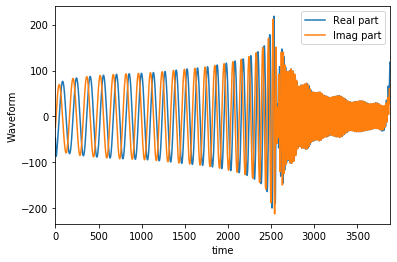

In [20]:
dset_h22 = ch5.read('rh_22')
fig, ax  = ch5.show('rh_22')

## 3. Metadata

Here we give an example on how to write metadata in CoRe format. Something like this must be, for example, every time a new simulations needs to the added to the CoRe DB (see the tutorial `watpy_CoReDB.ipynb`)

 First of all, all the steps above in 2. can be of course done also for a Cactus/THC simulation. We repeat few of them here:

In [1]:
from watpy.wave.wave import wave, mwaves
from watpy.utils import ioutils
import numpy as np
import os, glob

Msun_sec = 4.925794970773135e-06

thcsim = {}
thcsim['folder'] = './TestData/MySim_THC_135135' # simulation folder
thcsim['mass'] = 2 * 1.364 # binary mass in solar masses
thcsim['q'] = 1.0 # mass ratio, >= 1
thcsim['f0_Hz'] = 565.08 # initial GW frequency in Hz
thcsim['f0'] = thcsim['f0_Hz'] * Msun_sec
thcsim['Momg22'] = thcsim['mass'] * thcsim['f0'] / (2*np.pi) # initial GW frequency in geom. units
thcsim['massA'] = 1.364
thcsim['massB'] = 1.364
thcsim['madm'] = 2.703 # ADM mass (t=0) 
thcsim['jadm'] = 7.400 # ADM ang.mom. (t=0) 
# etc
thcsim['pre-release-folder'] = './TestData/MySim_THC_135135/CoReDB' # folder with CoRe formatted files

# Create folder for CoRe output
os.makedirs(thcsim['pre-release-folder'], exist_ok = True)

fnames = [os.path.split(x)[1] for x in glob.glob('{}/{}'.format(thcsim['folder'],'mp_Psi4_l?_m?_r400.00.asc'))]

wm = mwaves(path = thcsim['folder'], code = 'cactus', filenames = fnames, 
            mass = thcsim['mass'], f0 = thcsim['f0'], ignore_negative_m=True)

h22 = wm.get(l=2, m=2)
fig = h22.show_strain()

for (l,m) in wm.modes:
    
        psilm = wm.get(var='Psi4',l=l, m=m)
        psilm.write_to_txt('Psi4', thcsim['pre-release-folder'])
        
        hlm = wm.get(l=l, m=m)
        hlm.write_to_txt('h', thcsim['pre-release-folder'])

wm.energetics(thcsim['massA'], thcsim['massB'], thcsim['madm'], thcsim['jadm'], 
              path_out = thcsim['pre-release-folder'])

# etc ...

In the section above the `thcsim` dictionary is (carefully) written using (some of) the keys for the CoRe DB metadata. The latter are stored in a `CoRe_md()` object, which basically contains a dictionary. Lets see what is inside:

In [2]:
from watpy.coredb.metadata import CoRe_md

md = CoRe_md() # initialized empty
print(md.path)
print(md.data)

md.info() # describes the metadata

.
{'database_key': '', 'simulation_name': '', 'available_resolutions': None, 'reference_bibkeys': '', 'id_code': '', 'id_type': '', 'id_mass': '', 'id_rest_mass': '', 'id_mass_ratio': '', 'id_ADM_mass': '', 'id_ADM_angularmomentum': '', 'id_gw_frequency_Hz': '', 'id_gw_frequency_Momega22': '', 'id_eos': '', 'id_kappa2T': '', 'id_Lambda': '', 'id_mass_starA': '', 'id_rest_mass_starA': '', 'id_spin_starA': '', 'id_LoveNum_kell_starA': '', 'id_Lambdaell_starA': '', 'id_mass_starB': '', 'id_rest_mass_starB': '', 'id_spin_starB': '', 'id_LoveNum_kell_starB': '', 'id_Lambdaell_starB': '', 'id_eccentricity': '', 'evolution_code': '', 'grid_refinement_levels': '', 'grid_refinement_levels_moving': '', 'grid_refinement_levels_npoints': '', 'grid_refinement_levels_moving_npoints': '', 'grid_spacing_min': '', 'grid_symmetries': '', 'grid_shells': '', 'grid_shells_radial_npoints': '', 'grid_shells_angular_npoints': '', 'grid_conservative_amr': '', 'metric_scheme': '', 'metric_boundary_conditions': 

To initialize this object we can either pass a text file like

```

# comment
key = value
...

```

or a dictionary, like `thcsim`. Lets do the latter thing and then use the `CoRe_md()` to write such a text file, i.e. a `metadata.txt`:

In [5]:
md.update_fromdict(thcsim)
# md = CoRe_md(md= thcsim) # alternatively, (re-)initialize

# show the metadata
for k,v, in md.data.items():
    print('{} = {}'.format(k,v))

# write
md.write(path='.', fname = 'metadata.txt')

database_key = 
simulation_name = 
available_resolutions = None
reference_bibkeys = 
id_code = 
id_type = 
id_mass = 
id_rest_mass = 
id_mass_ratio = 
id_ADM_mass = 
id_ADM_angularmomentum = 
id_gw_frequency_Hz = 
id_gw_frequency_Momega22 = 
id_eos = 
id_kappa2T = 
id_Lambda = 
id_mass_starA = 
id_rest_mass_starA = 
id_spin_starA = 
id_LoveNum_kell_starA = 
id_Lambdaell_starA = 
id_mass_starB = 
id_rest_mass_starB = 
id_spin_starB = 
id_LoveNum_kell_starB = 
id_Lambdaell_starB = 
id_eccentricity = 
evolution_code = 
grid_refinement_levels = 
grid_refinement_levels_moving = 
grid_refinement_levels_npoints = 
grid_refinement_levels_moving_npoints = 
grid_spacing_min = 
grid_symmetries = 
grid_shells = 
grid_shells_radial_npoints = 
grid_shells_angular_npoints = 
grid_conservative_amr = 
metric_scheme = 
metric_boundary_conditions = 
eos_evolution_Gamma_thermal = 
hydro_flux = 
hydro_reconstruction = 
hydro_atmosphere_level = 
hydro_atmosphere_factor = 
evolution_mol_scheme = 
number_of_o